In [1]:
# importando ass bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# carregando a base de dados
dados = pd.read_csv('houses_to_rent_v2.csv')
dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [3]:
# criando um dicionário para alterar as colunas do dataset 
coluna = {'city':'Cidade', 'area':'Area', 'rooms':'Qnt_Quartos', 'bathroom':'Qnt_Banheiros', 'parking spaces':'Vagas_Garagem',
'floor':'Andar', 'animal':'Animal', 'furniture':'Mobiliada', 'hoa (R$)':'Valor_Condo', 'rent amount (R$)':'Valor_Aluguel', 'property tax (R$)':'IPTU',
'fire insurance (R$)':'Seguro_Incendio', 'total (R$)':'Valor_Total'}

In [4]:
# aplicando ao conjunto de dados os novos nomes das colunas
dados = dados.rename(columns = coluna)
dados.head()

,Cidade,Area,Qnt_Quartos,Qnt_Banheiros,Vagas_Garagem,Andar,Animal,Mobiliada,Valor_Condo,Valor_Aluguel,IPTU,Seguro_Incendio,Valor_Total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
# dimensão do dataset, observa-se que tem 10692 registros e 13 colunas
dados.shape

(10692, 13)

In [6]:
# método para ter um panorama geral sobre o dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cidade           10692 non-null  object
 1   Area             10692 non-null  int64 
 2   Qnt_Quartos      10692 non-null  int64 
 3   Qnt_Banheiros    10692 non-null  int64 
 4   Vagas_Garagem    10692 non-null  int64 
 5   Andar            10692 non-null  object
 6   Animal           10692 non-null  object
 7   Mobiliada        10692 non-null  object
 8   Valor_Condo      10692 non-null  int64 
 9   Valor_Aluguel    10692 non-null  int64 
 10  IPTU             10692 non-null  int64 
 11  Seguro_Incendio  10692 non-null  int64 
 12  Valor_Total      10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Utilizando o método *info()* podemos perceber que os dados correspondem com seus tipos, exceto pela coluna *Andar* que ta definida com o tipo
*Object*.

In [7]:
# reumo estatístico
dados.describe()

,Area,Qnt_Quartos,Qnt_Banheiros,Vagas_Garagem,Valor_Condo,Valor_Aluguel,IPTU,Seguro_Incendio,Valor_Total
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [8]:
# resumo estatístico para as colunas que são categóricas
dados.describe(include = 'object')

,Cidade,Andar,Animal,Mobiliada
count,10692,10692,10692,10692
unique,5,35,2,2
top,São Paulo,-,acept,not furnished
freq,5887,2461,8316,8086


A coluna *Andar* do dataset é bem curiosa, o resumo estatístico acima aponta que os dados com maior frequência para esta coluna é " - " (um traço) e também é o top registro


In [9]:
# gerando uma cópia do dataframe
dados_copia = dados.copy()

In [10]:
# filtrando algumas colunas para análise
colunas_Selecionadas = ['Cidade', 'Qnt_Quartos','Valor_Aluguel']
dados_agrupado = dados_copia.filter(items = colunas_Selecionadas)
dados_agrupado.head()

,Cidade,Qnt_Quartos,Valor_Aluguel
0,São Paulo,2,3300
1,São Paulo,4,4960
2,Porto Alegre,1,2800
3,Porto Alegre,2,1112
4,São Paulo,1,800


In [11]:
# obtendo a quantidade de registro de aluguel para cada cidade no dataframe
dados_agrupado.groupby('Cidade').size()

Cidade
Belo Horizonte    1258
Campinas           853
Porto Alegre      1193
Rio de Janeiro    1501
São Paulo         5887
dtype: int64

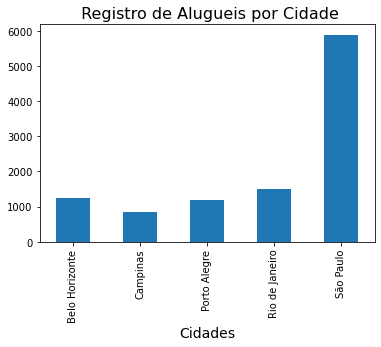

In [12]:
# gerando um gráfico de barras para visualizar esses dados
dados_agrupado.groupby('Cidade').size().plot(kind = 'bar')
plt.title(' Registro de Alugueis por Cidade', fontdict = {'size': 16})
plt.xlabel('Cidades', fontdict = {'size': 14})
plt.show()

In [13]:
# obtendo os valores maximos para quartos e valor de aluguel por cidade
dados_agrupado.groupby('Cidade').max()

,Qnt_Quartos,Valor_Aluguel
Cidade,,
Belo Horizonte,10,15000
Campinas,7,15000
Porto Alegre,8,19000
Rio de Janeiro,13,15000
São Paulo,10,45000


In [34]:
# obtendo a média para quartos e valor de aluguel
dados_agrupado.groupby('Cidade').mean()

,Qnt_Quartos,Valor_Aluguel
Cidade,,
Belo Horizonte,3.020668,3664.127981
Campinas,2.355217,2364.290739
Porto Alegre,2.140821,2337.699916
Rio de Janeiro,2.243837,3232.904064
São Paulo,2.558859,4652.793783


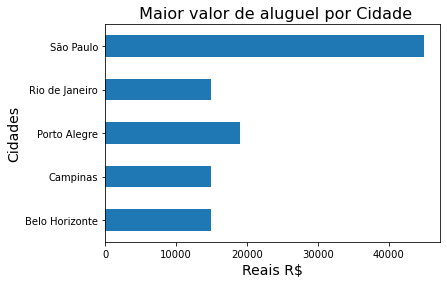

In [14]:
# visualizando os dados com o gráfico de barras para valores maximos por cidades 
dados_agrupado.groupby('Cidade')['Valor_Aluguel'].max().plot(kind = 'barh')
plt.title(' Maior valor de aluguel por Cidade', fontdict = {'size': 16})
plt.xlabel('Reais R$', fontdict = {'size': 14})
plt.ylabel('Cidades', fontdict = {'size':14})
plt.show()

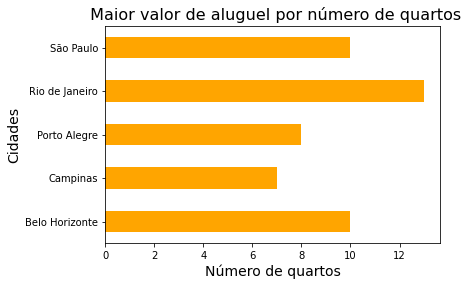

In [15]:
# visualizando os dados no gráfico para valores maximos de quartos por cidade
dados_agrupado.groupby('Cidade')['Qnt_Quartos'].max().plot(kind = 'barh', color = 'orange')
plt.title(' Maior valor de aluguel por número de quartos', fontdict = {'size': 16})
plt.ylabel('Cidades', fontdict = {'size': 14})
plt.xlabel('Número de quartos', fontdict = {'size': 14})
plt.show()

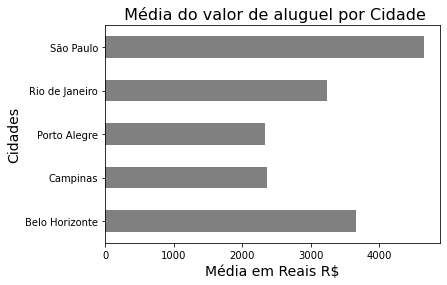

In [80]:
# visualizando a media do valor do aluguel por cidades
dados_agrupado.groupby('Cidade')['Valor_Aluguel'].mean().plot(kind = 'barh', color = 'Grey')
plt.title(' Média do valor de aluguel por Cidade', fontdict = {'size': 16})
plt.xlabel('Média em Reais R$', fontdict = {'size': 14})
plt.ylabel('Cidades', fontdict = {'size':14})
plt.show()

In [16]:
# contagem dos valores presente na coluna Andar
dados_copia['Andar'].value_counts()

-      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
23       25
25       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
301       1
51        1
46        1
35        1
Name: Andar, dtype: int64

In [19]:
# obtendo os valores únicos para Andar
dados_copia['Andar'].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

Então como percebemos anteriormente a coluna *andar* tem algumas características a serem consideradas para o tratamento dos dados. existem dois valores atipicos nessa coluna, considerando que se trata de aluguel de imóveis, os valores '301' e '51' são contados uma vez e se diferenciam muito dos outros registros observados. e também nota-se que '-' (o traço) identificado anteriormente provavelmente são de imóveis terreos. 

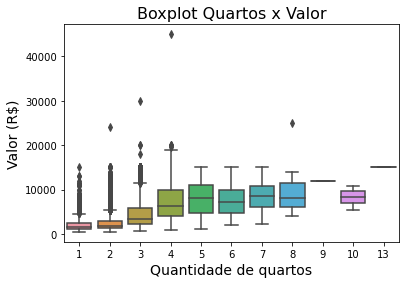

In [41]:
# boxplot para checar outilier e distribuição da quantidade de quartos em relação ao valor 
sns.boxplot(x = 'Qnt_Quartos', y = 'Valor_Aluguel', data = dados_agrupado)
plt.xlabel('Quantidade de quartos', fontdict = {'size':14})
plt.ylabel('Valor (R$)', fontdict = {'size':14})
plt.title('Boxplot Quartos x Valor', fontdict = {'size':16})
plt.show()

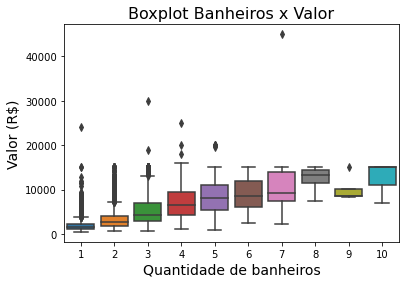

In [43]:
# boxplot para banheiros em relação ao valor
sns.boxplot(x = 'Qnt_Banheiros', y = 'Valor_Aluguel', data = dados_copia)
plt.xlabel('Quantidade de banheiros', fontdict = {'size':14})
plt.ylabel('Valor (R$)', fontdict = {'size':14})
plt.title('Boxplot Banheiros x Valor', fontdict = {'size':16})
plt.show()

In [72]:
# método do numpy que retorna a contagem dentro de cada bin e as bordas do histograma
cont, bin_edges = np.histogram(dados_copia['Valor_Aluguel'])
print(cont)
print(bin_edges)

[7952 1800  632  297    7    2    1    0    0    1]
[  450.  4905.  9360. 13815. 18270. 22725. 27180. 31635. 36090. 40545.
 45000.]


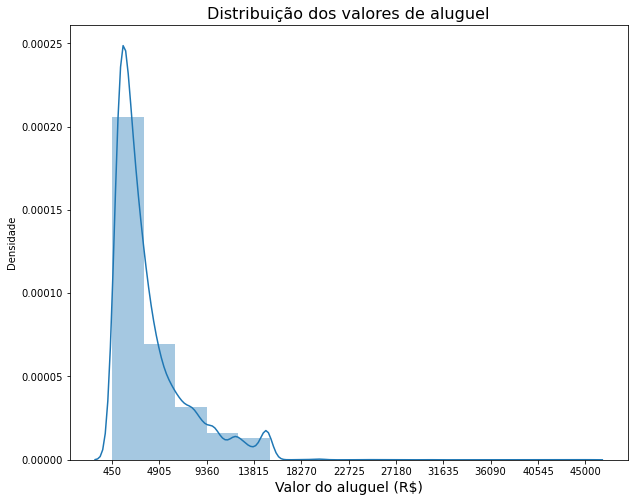

In [76]:
# observando a distribuição dos valores de aluguel 
plt.figure(figsize = (10, 8 ))
sns.distplot(dados_copia['Valor_Aluguel'], kde = True, bins = 15)
plt.xticks(ticks = bin_edges)
plt.xlabel('Valor do aluguel (R$)', fontdict = {'size': 14})
plt.ylabel('Densidade')
plt.title('Distribuição dos valores de aluguel', fontdict = {'size': 16})
plt.show()

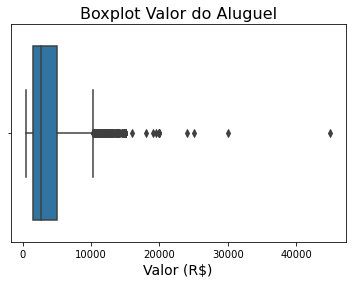

In [79]:
# boxplot do valor de aluguel 
sns.boxplot(dados['Valor_Aluguel'])
plt.title('Boxplot Valor do Aluguel', fontdict = {'size': 16})
plt.xlabel('Valor (R$)', fontdict = {'size': 14})
plt.show()

Observa-se que a coluna *Valor_Aluguel* tem alguns registros que são considerados outliers. Teremos que ponderar exluir alguns desses registros para deixar o modelo de Machine Learning mais genelarizado